In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MSE
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
df = pd.read_csv("exams.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## No Missing Data

In [6]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [10]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

## Visualizations
- There is a strong coorelation to performace in all test categoies
- but when segments by gender we see the following
- male and female -> both performed closely when comparing reading and writing
- females on the other hand performed much better when comparing reading and math scores, as well as writing and math 

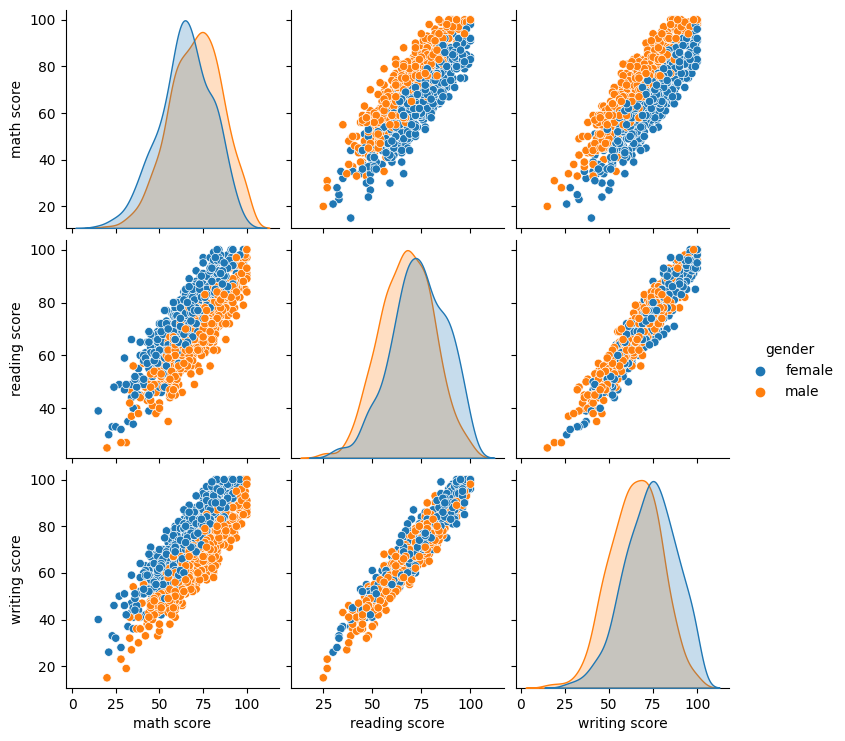

In [11]:
sns.pairplot(df, hue="gender")

## Average scores by gender
- gender performance by test

<AxesSubplot:xlabel='gender', ylabel='math score'>

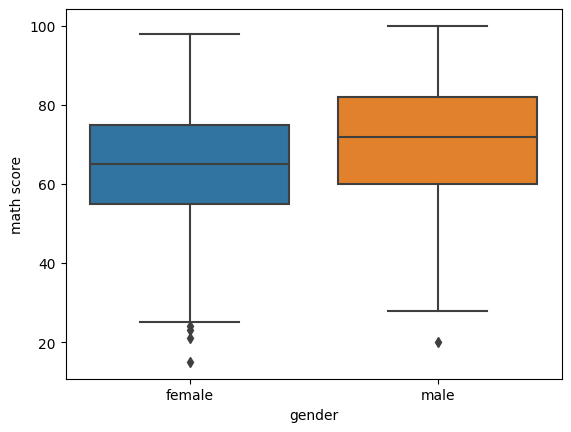

In [16]:
sns.boxplot(x = "gender", y = "math score", data = df)

<AxesSubplot:xlabel='gender', ylabel='writing score'>

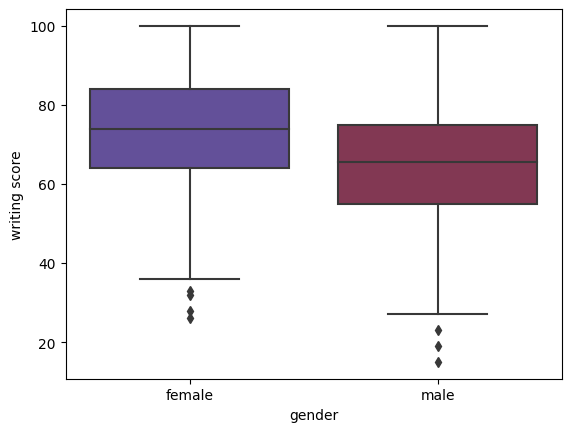

In [19]:
sns.boxplot(x = "gender", y = "writing score", data = df, palette="twilight")

<AxesSubplot:xlabel='gender', ylabel='reading score'>

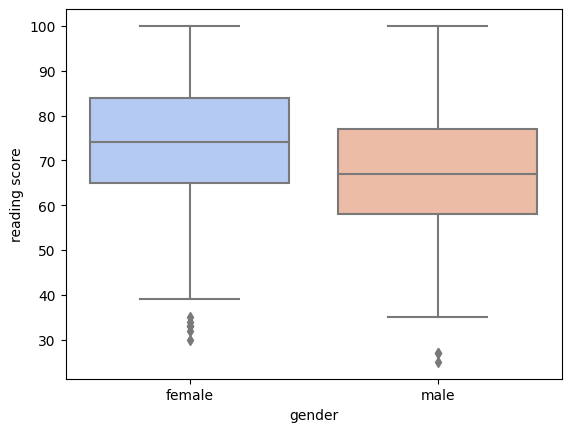

In [20]:
sns.boxplot(x = "gender", y = "reading score", data = df, palette="coolwarm")

## Checking Data balance
- balanced data set

In [23]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

<AxesSubplot:xlabel='gender', ylabel='count'>

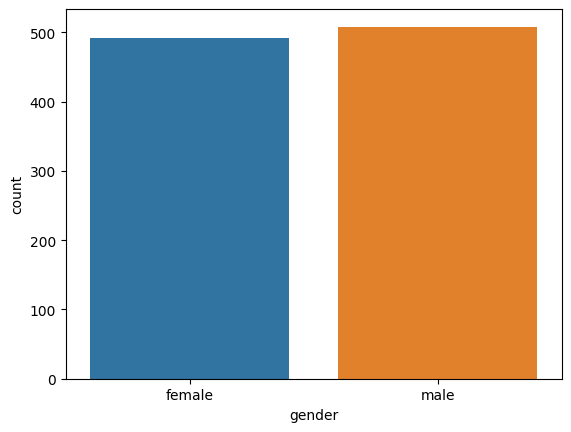

In [25]:
sns.countplot(x="gender", data = df)

## By Race
- smaller population in group A
- group C is dominant

<AxesSubplot:xlabel='gender', ylabel='count'>

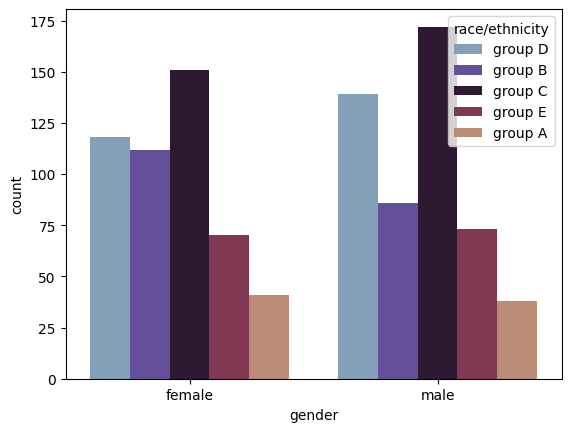

In [29]:
sns.countplot(x="gender", data = df, hue="race/ethnicity", palette="twilight")

## Parental lavel of ed

<AxesSubplot:xlabel='parental level of education', ylabel='count'>

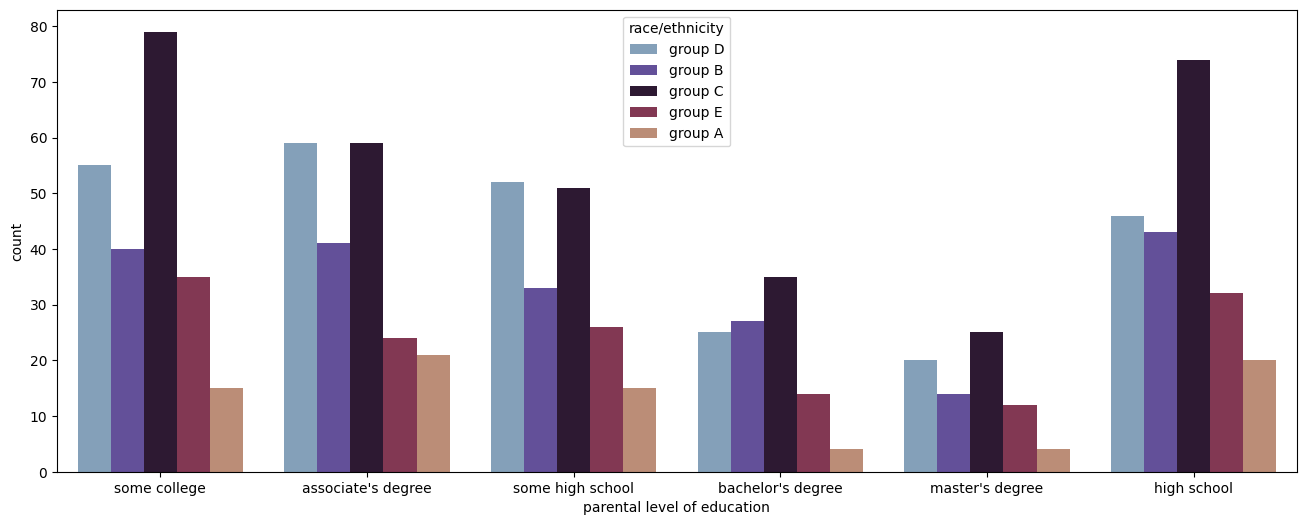

In [32]:
plt.figure(figsize=(16,6))
sns.countplot(x="parental level of education", data = df, hue="race/ethnicity", palette="twilight")

In [33]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

##  Parents Level of ed on scores
- shows no impact on scores

<AxesSubplot:xlabel='math score', ylabel='reading score'>

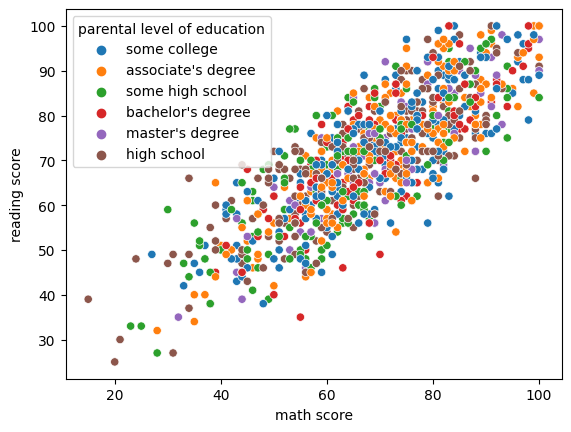

In [35]:
sns.scatterplot(x = "math score", y = "reading score", data = df, hue="parental level of education")

<AxesSubplot:xlabel='math score', ylabel='writing score'>

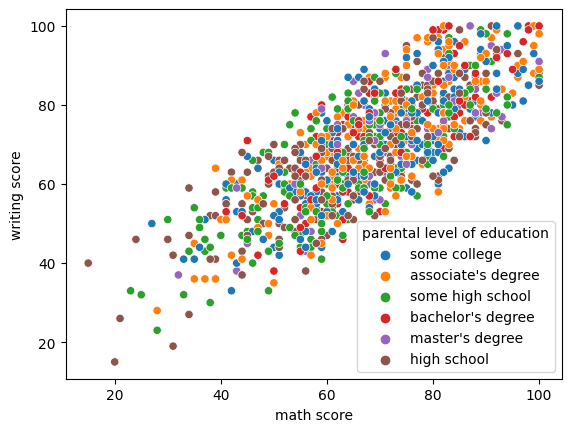

In [36]:
sns.scatterplot(x = "math score", y = "writing score", data = df, hue="parental level of education")

# test preparation course
- Not clearly but we do see slight impact on scores with a prepration course
- very lower scores apprears for students who do not take a course 

<AxesSubplot:xlabel='math score', ylabel='reading score'>

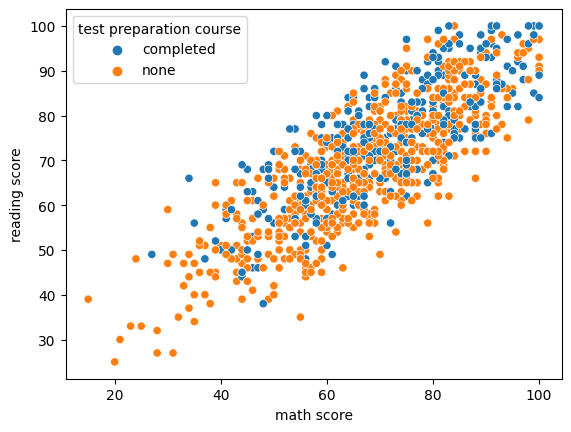

In [39]:
sns.scatterplot(x = "math score", y = "reading score", data = df, hue="test preparation course")

<AxesSubplot:xlabel='math score', ylabel='writing score'>

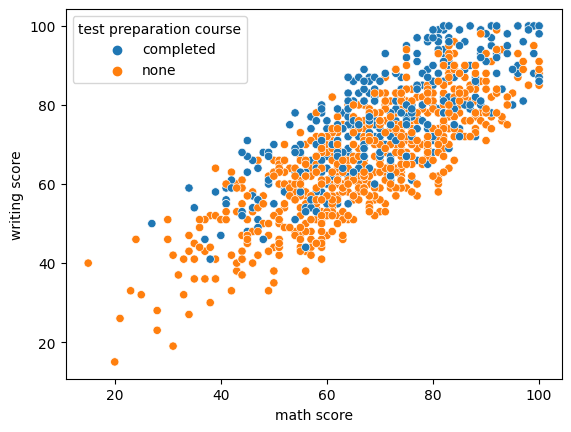

In [40]:
sns.scatterplot(x = "math score", y = "writing score", data = df, hue="test preparation course")

## Race/Eth on score
- not an effect

<AxesSubplot:xlabel='math score', ylabel='reading score'>

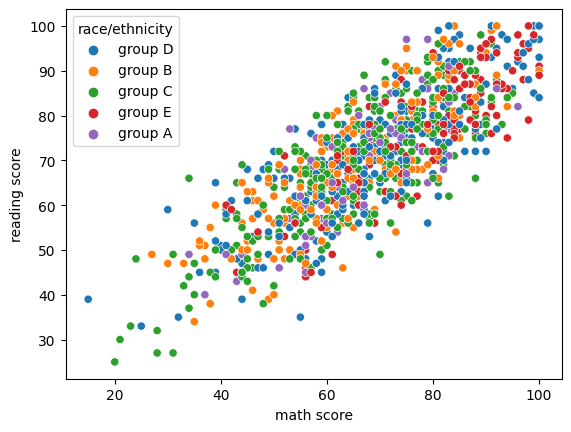

In [44]:
sns.scatterplot(x = "math score", y = "reading score", data = df, hue="race/ethnicity")

<AxesSubplot:xlabel='math score', ylabel='writing score'>

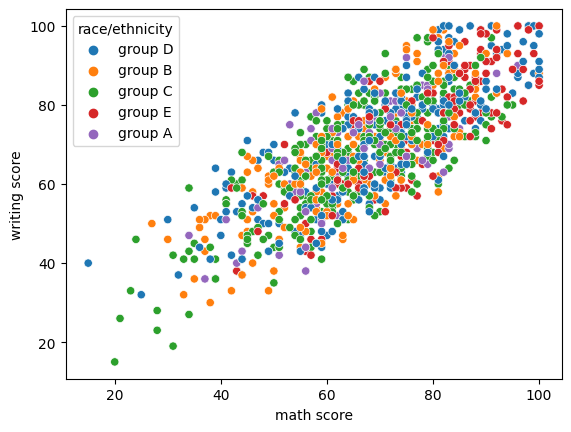

In [45]:
sns.scatterplot(x = "math score", y = "writing score", data = df, hue="race/ethnicity")

In [46]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [50]:
df["lunch"].unique()

array(['standard', 'free/reduced'], dtype=object)

## Lunch Effect
- We see a slight decline in scores based on lunch service
- This would most likely be a public school vs private school difference

<AxesSubplot:xlabel='lunch', ylabel='math score'>

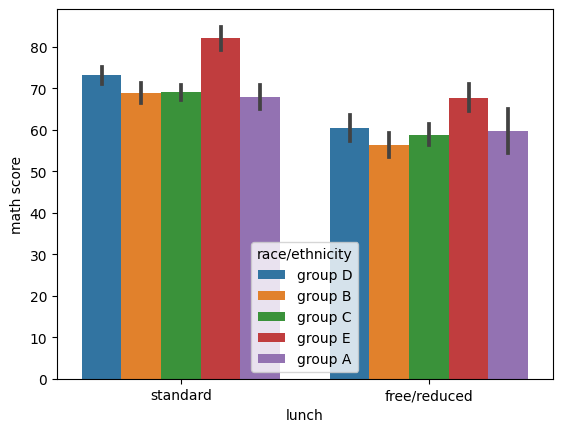

In [57]:
sns.barplot(x = "lunch", y = "math score", data = df, hue="race/ethnicity")

<AxesSubplot:xlabel='lunch', ylabel='writing score'>

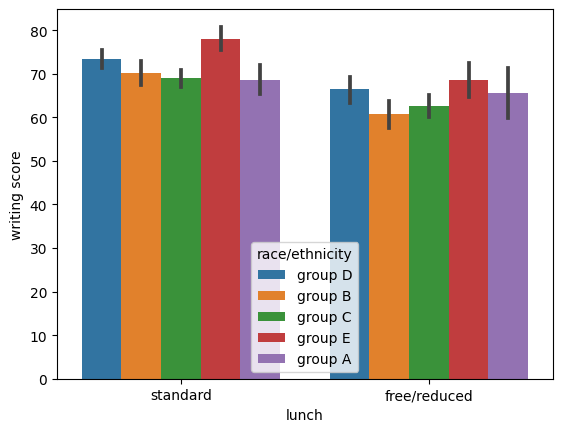

In [58]:
sns.barplot(x = "lunch", y = "writing score", data = df, hue="race/ethnicity")

<AxesSubplot:xlabel='lunch', ylabel='reading score'>

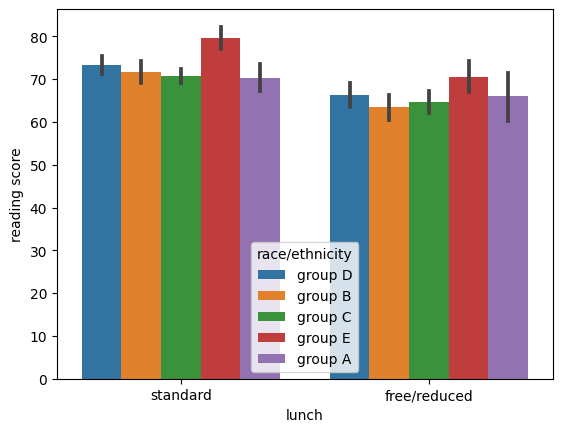

In [59]:
sns.barplot(x = "lunch", y = "reading score", data = df, hue="race/ethnicity")

## Average Scores by race 

In [67]:
df.groupby("race/ethnicity").mean()

,math score,reading score,writing score
race/ethnicity,,,
group A,65.696203,69.202532,67.848101
group B,64.070707,68.530303,66.717172
group C,65.510836,68.609907,66.804954
group D,68.879377,70.929961,71.058366
group E,77.426573,76.615385,75.034965


- Group B had the lowest math score average
- Group E exceled in all all areas , follwed by group D

<AxesSubplot:xlabel='race/ethnicity'>

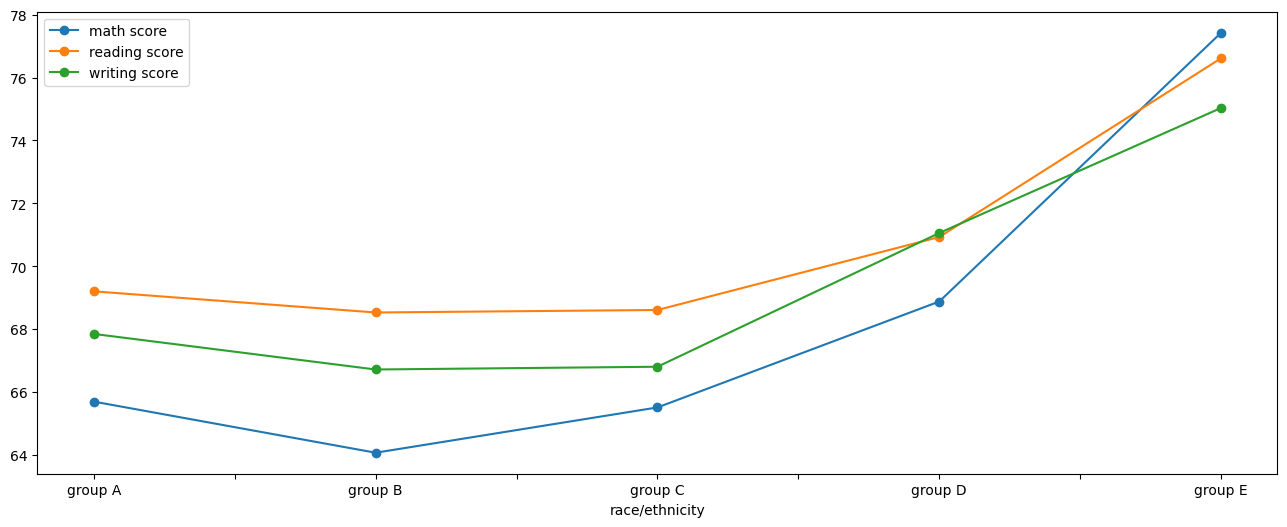

In [66]:
df.groupby("race/ethnicity").mean().plot(figsize = (16,6), marker ="o")

In [72]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

- We do see that, kids of parents who has comppleted high school/ or  droped out earned lower scored overall.
- So some college, or a degree overall increased performance

<AxesSubplot:xlabel='parental level of education'>

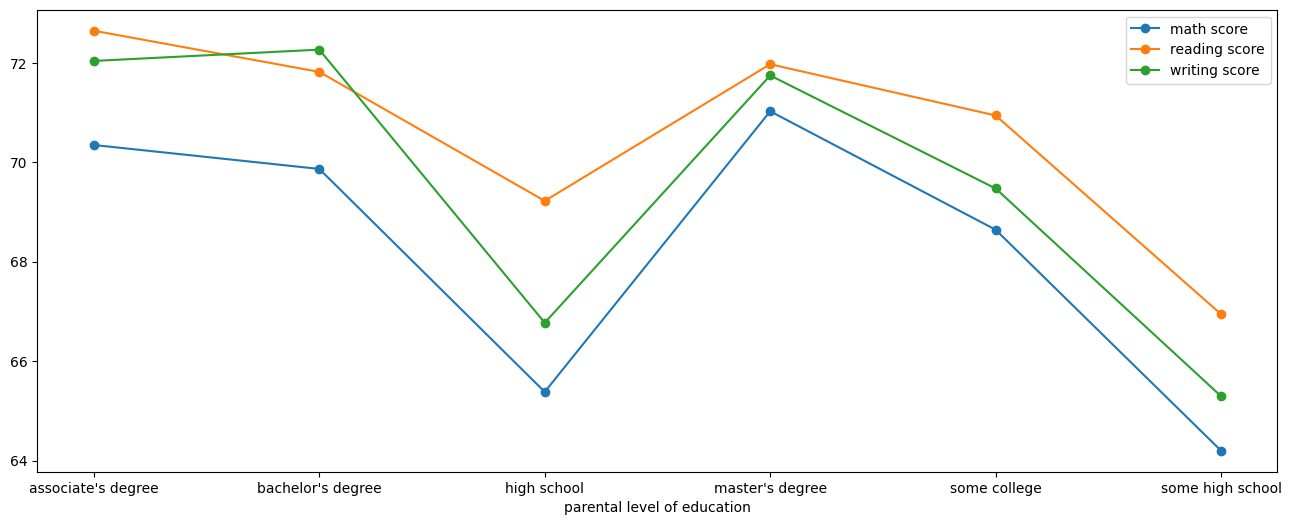

In [73]:
df.groupby("parental level of education").mean().plot(figsize = (16,6), marker ="o")

## Average with prepration course
- WE see more of a clear distinction with a prepration course
- on averge a 10 point difference

<AxesSubplot:xlabel='test preparation course'>

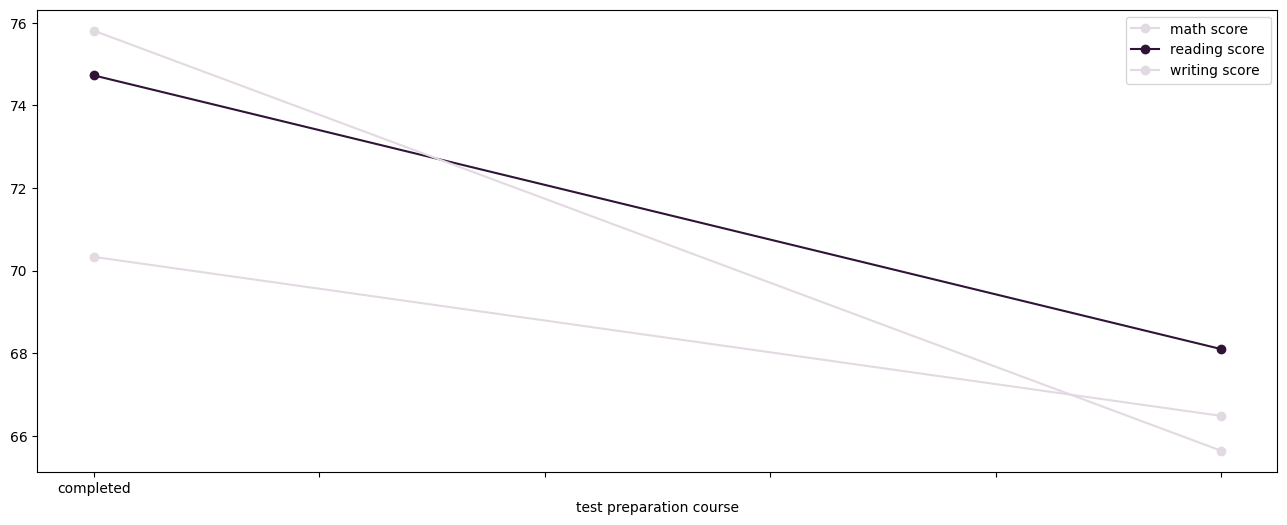

In [80]:
df.groupby("test preparation course").mean().plot(figsize = (16,6), marker ="o", cmap = "twilight")

## Creating ML model 
- Data processing

In [81]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


## One hot encoding

In [82]:
df["gender"] = pd.get_dummies(df["gender"], drop_first=True)

In [84]:
df["lunch"] = pd.get_dummies(df["lunch"], drop_first=True)

In [86]:
df["test preparation course"] = pd.get_dummies(df["test preparation course"], drop_first=True)

In [90]:
raceandEth = pd.get_dummies(df["race/ethnicity"], drop_first=True)

In [91]:
df = pd.concat([df,raceandEth], axis=1)

In [93]:
df.drop("race/ethnicity", axis=1, inplace=True)

In [97]:
parentalEd = pd.get_dummies(df["parental level of education"], drop_first=True)

In [98]:
df= pd.concat([df,parentalEd], axis=1)

In [100]:
df.drop("parental level of education", axis=1, inplace=True)

## Scaling
- we can return later 

## Math Scores
- We will initial attempt to predict math scores

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X = df.drop("math score", axis=1).values
y = df["math score"].values

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [108]:
from sklearn.preprocessing import MinMaxScaler

In [109]:
scalar = MinMaxScaler()

In [110]:
X_train = scalar.fit_transform(X_train)

In [111]:
X_test = scalar.transform(X_test)

In [114]:
X_train.shape

(700, 14)

## Creating Model

In [140]:
model = Sequential()
model.add(Dense(units=160, activation="relu"))
model.add(Dense(units=150, activation="relu"))
model.add(Dense(units=140, activation="relu"))
model.add(Dense(units=120, activation="relu"))
model.add(Dense(units=50, activation="relu"))
model.add(Dense(units=30, activation="relu"))
model.add(Dense(units=20, activation="relu"))

model.add(Dense(units=1, activation="relu"))

model.compile(loss = "mse", optimizer = "adam")

In [141]:
stop = EarlyStopping(patience=500)

In [142]:
model.fit(X_train, y_train, epochs = 3000, validation_data = (X_test, y_test), callbacks = [stop])

Train on 700 samples, validate on 300 samples
Epoch 1/3000
700/700 [==============================] - 1s 1ms/sample - loss: 4742.1991 - val_loss: 4668.7603
Epoch 2/3000
700/700 [==============================] - 0s 520us/sample - loss: 2365.5599 - val_loss: 347.7008
Epoch 3/3000
700/700 [==============================] - 0s 540us/sample - loss: 264.9296 - val_loss: 160.1370
Epoch 4/3000
700/700 [==============================] - 0s 533us/sample - loss: 123.5670 - val_loss: 93.6197
Epoch 5/3000
700/700 [==============================] - 0s 495us/sample - loss: 86.8878 - val_loss: 72.1584
Epoch 6/3000
700/700 [==============================] - 0s 451us/sample - loss: 71.1733 - val_loss: 65.9473
Epoch 7/3000
700/700 [==============================] - 0s 477us/sample - loss: 59.3283 - val_loss: 52.2113
Epoch 8/3000
700/700 [==============================] - 0s 439us/sample - loss: 49.6787 - val_loss: 44.6466
Epoch 9/3000
700/700 [==============================] - 0s 468us/sample - loss: 43

Epoch 76/3000
700/700 [==============================] - 0s 428us/sample - loss: 24.3735 - val_loss: 33.7466
Epoch 77/3000
700/700 [==============================] - 0s 422us/sample - loss: 22.5533 - val_loss: 33.1054
Epoch 78/3000
700/700 [==============================] - 0s 426us/sample - loss: 22.8891 - val_loss: 33.2003
Epoch 79/3000
700/700 [==============================] - 0s 430us/sample - loss: 25.1245 - val_loss: 44.3136
Epoch 80/3000
700/700 [==============================] - 0s 425us/sample - loss: 24.6554 - val_loss: 33.8817
Epoch 81/3000
700/700 [==============================] - 0s 427us/sample - loss: 24.6009 - val_loss: 50.4980
Epoch 82/3000
700/700 [==============================] - 0s 440us/sample - loss: 25.0162 - val_loss: 32.5630
Epoch 83/3000
700/700 [==============================] - 0s 425us/sample - loss: 22.0900 - val_loss: 33.4535
Epoch 84/3000
700/700 [==============================] - 0s 441us/sample - loss: 22.0519 - val_loss: 33.8894
Epoch 85/3000
700/7

700/700 [==============================] - 0s 413us/sample - loss: 22.2034 - val_loss: 37.4186
Epoch 151/3000
700/700 [==============================] - 0s 422us/sample - loss: 21.4100 - val_loss: 37.5973
Epoch 152/3000
700/700 [==============================] - 0s 440us/sample - loss: 20.6034 - val_loss: 35.9237
Epoch 153/3000
700/700 [==============================] - 0s 435us/sample - loss: 19.6140 - val_loss: 36.1542
Epoch 154/3000
700/700 [==============================] - 0s 415us/sample - loss: 21.5336 - val_loss: 40.1505
Epoch 155/3000
700/700 [==============================] - 0s 415us/sample - loss: 23.4234 - val_loss: 37.0919
Epoch 156/3000
700/700 [==============================] - 0s 416us/sample - loss: 21.7845 - val_loss: 51.1994
Epoch 157/3000
700/700 [==============================] - 0s 425us/sample - loss: 24.3828 - val_loss: 35.5491
Epoch 158/3000
700/700 [==============================] - 0s 408us/sample - loss: 19.6235 - val_loss: 35.4980
Epoch 159/3000
700/700 [=

700/700 [==============================] - 0s 578us/sample - loss: 18.6128 - val_loss: 36.1357
Epoch 225/3000
700/700 [==============================] - 0s 532us/sample - loss: 19.6163 - val_loss: 38.2305
Epoch 226/3000
700/700 [==============================] - 0s 413us/sample - loss: 19.2787 - val_loss: 44.8294
Epoch 227/3000
700/700 [==============================] - 0s 437us/sample - loss: 21.8236 - val_loss: 35.9661
Epoch 228/3000
700/700 [==============================] - 0s 443us/sample - loss: 18.6003 - val_loss: 37.7329
Epoch 229/3000
700/700 [==============================] - 0s 432us/sample - loss: 19.5069 - val_loss: 37.6251
Epoch 230/3000
700/700 [==============================] - 0s 427us/sample - loss: 19.0669 - val_loss: 37.2271
Epoch 231/3000
700/700 [==============================] - 0s 409us/sample - loss: 18.6219 - val_loss: 37.5135
Epoch 232/3000
700/700 [==============================] - 0s 445us/sample - loss: 18.4681 - val_loss: 36.0694
Epoch 233/3000
700/700 [=

700/700 [==============================] - 0s 418us/sample - loss: 17.3388 - val_loss: 37.9291
Epoch 299/3000
700/700 [==============================] - 0s 409us/sample - loss: 17.6840 - val_loss: 37.3630
Epoch 300/3000
700/700 [==============================] - 0s 404us/sample - loss: 18.4807 - val_loss: 40.1362
Epoch 301/3000
700/700 [==============================] - 0s 415us/sample - loss: 17.3589 - val_loss: 41.1581
Epoch 302/3000
700/700 [==============================] - 0s 449us/sample - loss: 18.2681 - val_loss: 40.6283
Epoch 303/3000
700/700 [==============================] - 0s 429us/sample - loss: 20.0785 - val_loss: 44.2558
Epoch 304/3000
700/700 [==============================] - 0s 412us/sample - loss: 21.0821 - val_loss: 41.6708
Epoch 305/3000
700/700 [==============================] - 3s 4ms/sample - loss: 20.0768 - val_loss: 38.1989
Epoch 306/3000
700/700 [==============================] - 2s 3ms/sample - loss: 18.6533 - val_loss: 38.5700
Epoch 307/3000
700/700 [=====

700/700 [==============================] - 0s 394us/sample - loss: 16.5761 - val_loss: 37.9399
Epoch 373/3000
700/700 [==============================] - 0s 397us/sample - loss: 17.4324 - val_loss: 40.5290
Epoch 374/3000
700/700 [==============================] - 0s 397us/sample - loss: 22.1705 - val_loss: 42.2777
Epoch 375/3000
700/700 [==============================] - 0s 438us/sample - loss: 16.9909 - val_loss: 38.5282
Epoch 376/3000
700/700 [==============================] - 0s 408us/sample - loss: 18.7667 - val_loss: 39.4275
Epoch 377/3000
700/700 [==============================] - 0s 382us/sample - loss: 19.1493 - val_loss: 40.5482
Epoch 378/3000
700/700 [==============================] - 0s 429us/sample - loss: 16.2406 - val_loss: 38.6598
Epoch 379/3000
700/700 [==============================] - 0s 427us/sample - loss: 16.0690 - val_loss: 42.9010
Epoch 380/3000
700/700 [==============================] - 0s 415us/sample - loss: 18.7832 - val_loss: 40.9107
Epoch 381/3000
700/700 [=

700/700 [==============================] - 0s 401us/sample - loss: 16.2386 - val_loss: 40.9577
Epoch 447/3000
700/700 [==============================] - 0s 432us/sample - loss: 18.7708 - val_loss: 49.2382
Epoch 448/3000
700/700 [==============================] - 0s 405us/sample - loss: 19.3094 - val_loss: 40.3078
Epoch 449/3000
700/700 [==============================] - 0s 405us/sample - loss: 17.0015 - val_loss: 52.9906
Epoch 450/3000
700/700 [==============================] - 0s 399us/sample - loss: 20.9030 - val_loss: 39.5909
Epoch 451/3000
700/700 [==============================] - 0s 400us/sample - loss: 17.2795 - val_loss: 42.3091
Epoch 452/3000
700/700 [==============================] - 0s 404us/sample - loss: 16.9845 - val_loss: 41.4209
Epoch 453/3000
700/700 [==============================] - 0s 386us/sample - loss: 15.5644 - val_loss: 41.5393
Epoch 454/3000
700/700 [==============================] - 0s 418us/sample - loss: 16.2029 - val_loss: 43.3243
Epoch 455/3000
700/700 [=

<AxesSubplot:>

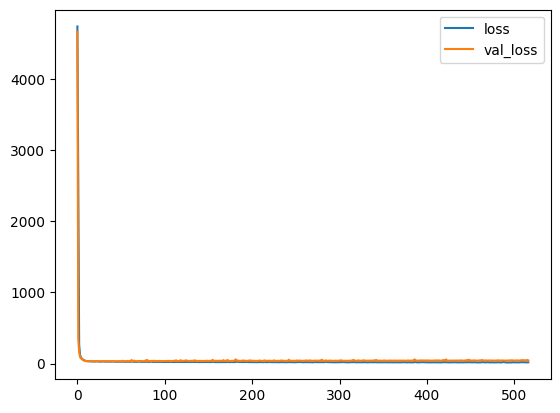

In [143]:
pd.DataFrame(model.history.history)[["loss", "val_loss"]].plot()

In [144]:
predictions = model.predict(X_test)

In [145]:
predictions

array([[78.15656 ],
       [76.11982 ],
       [40.1457  ],
       [66.96584 ],
       [87.96011 ],
       [51.340515],
       [74.46202 ],
       [24.029316],
       [83.2474  ],
       [87.03396 ],
       [50.369278],
       [82.48603 ],
       [98.27535 ],
       [71.24493 ],
       [47.273067],
       [82.43669 ],
       [72.421486],
       [64.92848 ],
       [72.87568 ],
       [46.284325],
       [86.27521 ],
       [66.62092 ],
       [57.7131  ],
       [81.75334 ],
       [64.33593 ],
       [71.39006 ],
       [63.73635 ],
       [79.58959 ],
       [63.96312 ],
       [73.09117 ],
       [58.77055 ],
       [85.18325 ],
       [78.92235 ],
       [58.850716],
       [40.13547 ],
       [82.37015 ],
       [70.81068 ],
       [60.36155 ],
       [73.47028 ],
       [67.38378 ],
       [47.11021 ],
       [67.52236 ],
       [81.84252 ],
       [85.811554],
       [55.14663 ],
       [76.33734 ],
       [57.791912],
       [43.80082 ],
       [70.79681 ],
       [52.09067 ],


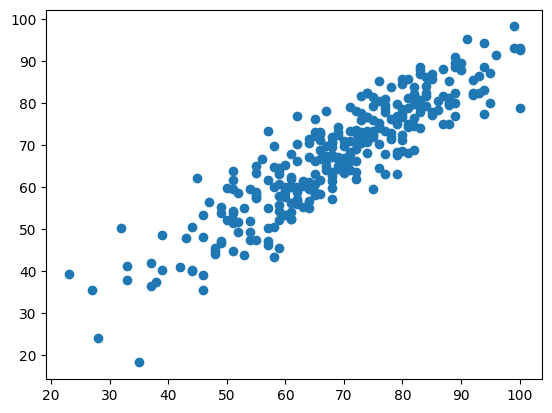

In [146]:
plt.scatter(y_test,predictions)